In [1]:
import pandas as pd

In [2]:
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, InputLayer, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import tensorflow as tf
from PIL import Image
from tensorflow import keras
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.9

tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))


Using TensorFlow backend.


In [3]:
def preprocess(image):
    #resized_image = tf.image.resize(image,[224,224])
    final_image=keras.applications.xception.preprocess_input(image)
    return final_image


In [4]:
train_datagen = ImageDataGenerator(validation_split = 0.2,preprocessing_function=preprocess)

In [5]:
train_generator = train_datagen.flow_from_directory(
        r'D:\Downloads\Copy of shopee-product-detection-dataset\train\train',
        subset = 'training',# this is the target directory
        target_size=(224, 224),  # all images will be resized to 150x150
        batch_size=32,
        color_mode="rgb",
        class_mode="categorical",
        shuffle=True,
        seed=42) 


val_generator = train_datagen.flow_from_directory(
        r'D:\Downloads\Copy of shopee-product-detection-dataset\train\train',
        subset = 'validation',# this is the target directory
        target_size=(224, 224),  # all images will be resized to 150x150
        batch_size=32,
        color_mode="rgb",
        class_mode="categorical",
        shuffle=True,
        seed=42) 


Found 84331 images belonging to 42 classes.
Found 21061 images belonging to 42 classes.


In [6]:
pd.DataFrame(train_generator[0][1])

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
train_generator[0][0].shape

(32, 224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


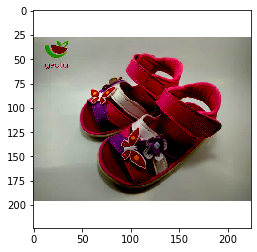

In [8]:
from matplotlib import pyplot as plt
plt.imshow(train_generator[0][0][1], interpolation='nearest')
plt.show()

In [23]:
base_model=keras.applications.xception.Xception(weights="imagenet",include_top=False)


In [24]:
for layer in base_model.layers:
    layer.trainable=False

In [25]:
inputs=keras.Input(shape=(224,224,3))
base_model=base_model(inputs,training=False)

In [26]:
avg=keras.layers.GlobalAveragePooling2D()(base_model)
output=keras.layers.Dense(42,activation="softmax")(avg)
model=keras.Model(inputs=inputs,outputs=output)

In [27]:
optimizer=keras.optimizers.SGD(lr=0.2,momentum=0.9,decay=0.01)
model.compile(loss="categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])

In [28]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
xception (Model)             multiple                  20861480  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 42)                86058     
Total params: 20,947,538
Trainable params: 86,058
Non-trainable params: 20,861,480
_________________________________________________________________


In [29]:
history=model.fit(train_generator,epochs=5,validation_data=val_generator)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 2636 steps, validate for 659 steps
Epoch 1/5
2636/2636 [==============================] - 7273s 3s/step - loss: 1.6510 - accuracy: 0.6257 - val_loss: 1.2578 - val_accuracy: 0.6663
Epoch 2/5
2636/2636 [==============================] - 1290s 489ms/step - loss: 1.0470 - accuracy: 0.7113 - val_loss: 1.1932 - val_accuracy: 0.6783
Epoch 3/5
2636/2636 [==============================] - 1144s 434ms/step - loss: 0.9856 - accuracy: 0.7274 - val_loss: 1.1739 - val_accuracy: 0.6829
Epoch 4/5
2636/2636 [==============================] - 1150s 436ms/step - loss: 0.9575 - accuracy: 0.7345 - val_loss: 1.1664 - val_accuracy: 0.6847
Epoch 5/5
2636/2636 [==============================] - 1146s 435ms/step - loss: 0.9401 - accuracy: 0.7392 - val_loss: 1.1598 - val_accuracy: 0.6853


In [30]:
base_model.trainable=True
    
optimizer=keras.optimizers.SGD(lr=0.01,nesterov=True,momentum=0.9,decay=0.001)
model.compile(loss="categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])
history=model.fit_generator(train_generator,epochs=30,validation_data=val_generator,callbacks=[
        EarlyStopping(patience=3, restore_best_weights=True),
        ReduceLROnPlateau(patience=2)
    ])

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 2636 steps, validate for 659 steps
Epoch 1/30
2636/2636 [==============================] - 1149s 436ms/step - loss: 0.9613 - accuracy: 0.7324 - val_loss: 1.1561 - val_accuracy: 0.6871
Epoch 2/30
2636/2636 [==============================] - 1145s 434ms/step - loss: 0.9110 - accuracy: 0.7485 - val_loss: 1.1526 - val_accuracy: 0.6869
Epoch 3/30
2636/2636 [==============================] - 1161s 441ms/step - loss: 0.8957 - accuracy: 0.7520 - val_loss: 1.1454 - val_accuracy: 0.6879
Epoch 4/30
2636/2636 [==============================] - 1146s 435ms/step - loss: 0.8868 - accuracy: 0.7550 - val_loss: 1.1429 - val_accuracy: 0.6893
Epoch 5/30
2636/2636 [==============================] - 1144s 434ms/step - loss: 0.8811 - accuracy: 0.7566 - val_loss: 1.1423 - val_accuracy: 0.6897
Epoch 6/30
2636/2636 [==============================] - 1145s 434ms/step - loss: 0.8

In [31]:
base_model.trainable=True
    
optimizer=keras.optimizers.SGD(lr=0.01,nesterov=True,momentum=0.9,decay=0.001)
model.compile(loss="categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])
history=model.fit_generator(train_generator,epochs=30,validation_data=val_generator,callbacks=[
        EarlyStopping(patience=3, restore_best_weights=True),
        ReduceLROnPlateau(patience=2)
    ])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 2636 steps, validate for 659 steps
Epoch 1/30
2636/2636 [==============================] - 1331s 505ms/step - loss: 0.8962 - accuracy: 0.7497 - val_loss: 1.1429 - val_accuracy: 0.6884
Epoch 2/30
2636/2636 [==============================] - 1154s 438ms/step - loss: 0.8535 - accuracy: 0.7634 - val_loss: 1.1360 - val_accuracy: 0.6898
Epoch 3/30
2636/2636 [==============================] - 1128s 428ms/step - loss: 0.8403 - accuracy: 0.7683 - val_loss: 1.1355 - val_accuracy: 0.6912
Epoch 4/30
2636/2636 [==============================] - 1115s 423ms/step - loss: 0.8332 - accuracy: 0.7706 - val_loss: 1.1341 - val_accuracy: 0.6908
Epoch 5/30
2636/2636 [==============================] - 1174s 445ms/step - loss: 0.8290 - accuracy: 0.7712 - val_loss: 1.1330 - val_accuracy: 0.6923
Epoch 6/30
2636/2636 [==============================] - 1371s 520ms/step - loss: 0.8255 - accuracy: 0.7731 - val_loss: 1.1323 - val_accuracy: 0.6921
Epoch 7/30
